In [1]:
pip install opencv-python
pip install matplotlib
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

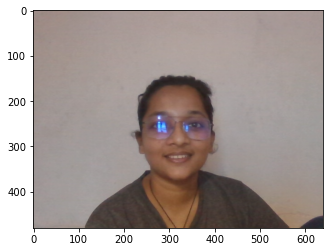

In [34]:
videoCaptureObject = cv2.VideoCapture(0)
ret, frame = videoCaptureObject.read()
color_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(color_img)
videoCaptureObject.release()

In [35]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = faceCascade.detectMultiScale(color_img, 1.1, 4)
for (x,y,u,v) in faces:
    cv2.rectangle(color_img, (x,y), (x+u,y+v), (0,0,225), 2)

In [36]:
prediction = DeepFace.analyze(color_img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.16it/s]


In [37]:
prediction

{'emotion': {'angry': 41.84507429599762,
  'disgust': 0.0012840816452808212,
  'fear': 2.4538496509194374,
  'happy': 48.725906014442444,
  'sad': 1.7396744340658188,
  'surprise': 0.5586358718574047,
  'neutral': 4.675574973225594},
 'dominant_emotion': 'happy',
 'region': {'x': 241, 'y': 180, 'w': 163, 'h': 163},
 'age': 29,
 'gender': 'Man',
 'race': {'asian': 19.507035613059998,
  'indian': 17.016707360744476,
  'black': 31.003955006599426,
  'white': 1.36005487293005,
  'middle eastern': 0.8225985802710056,
  'latino hispanic': 30.289646983146667},
 'dominant_race': 'black'}

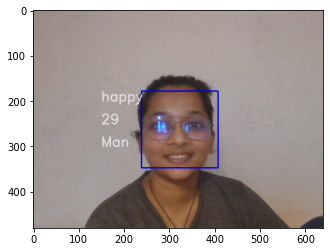

In [38]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(color_img, prediction['dominant_emotion'], (150,200), font, 1, (225,225,225), 2, cv2.LINE_4)
cv2.putText(color_img, str(prediction['age']), (150,250), font, 1, (225,225,225), 2, cv2.LINE_4)
cv2.putText(color_img, prediction['gender'], (150,300), font, 1, (225,225,225), 2, cv2.LINE_4)
plt.imshow(color_img)